In [64]:
import numpy as np
import matplotlib.pyplot as plt
import os
from scipy.stats import vonmises, t

In [473]:
def run_simulations(n_exp = 50, pop_size=100, init = 0.1, n_gen = 5000, self_ref = True, meta_mutation_rate = 0.1, nlevels = 5, topk = 8, type = "instant"):
    """
        Initialize the parameters.

        Parameters:
        -----------
        n_exp : int, default=50
            The number of independent experiments performed.
        
        pop_size : int, default=100
            The number of individuals in the population

        init : float, default=0.1
            The initialization of meta-parameters.

        n_gen : int, default=5000
            Total number of generations.

        self_ref : bool, default=True
            Whether self-referential mutation rates are used (True) or not (False)

        meta_mutation_rate : float, default=0.1
            The (external) meta mutation rate. It is used only if self-referential mutations rates are not used (referential = False).

        nlevels : int, default=5
            Total number of levels, INCLUDING the solution level.

        topk : int, default=8
            The top-k parameter determining the number of top solutions that have children.

        type : str, default="instant"
            Determining how the mutations propagate - instantly ("instant") or in a delayed manner ("delayed)

        Returns:
        allbestfitnesses : np.array
            A np.array containing all of the best-of-generation fitnesses
        allbesties: np.array
            A np.array containing the best solution from every generation
        allsigmas: np.array
        A np.array containing the total history of solutions and mutation rates
        """

    allbestfitnesses = []
    allbesties = []
    allsigmas = []
    for j in range(n_exp):
        sigmas_history = []
        sigmas = init*np.ones((nlevels,pop_size))
        sigmas[-1,:] = 1000
        bestfitnesses = []
        besties = []
        sigmas_history.append(sigmas.copy())
        for i in range(n_gen-1):
            #fitnesses = np.abs(sigmas[-1,:]-np.ones(pop_size)*np.exp(-5*abs(i % 200 - 100) / 100))
            solutions = sigmas[-1,:]
            fitnesses = np.abs(solutions-np.zeros(pop_size))
            sort_indices = np.argsort(fitnesses)
            bestindex = sort_indices[0]
            bestfitnesses.append(fitnesses[bestindex])
            besties.append(sigmas[:,bestindex].copy())
            top_indices = sort_indices[:topk]
            other_indices = np.array([i for i in range(pop_size) if i not in top_indices])
            sampled_indices = np.random.choice(top_indices, size=len(other_indices), replace=True)
            sigmas[:,other_indices] = sigmas[:,sampled_indices]
            if type == "instant":
                if self_ref == True:
                    sigmas[0,:] += np.random.normal(0,abs(sigmas[0,:]))
                else:
                    sigmas[0,:] += np.random.normal(0,meta_mutation_rate)
                for k in range(1,nlevels,1): 
                    sigmas[k,:] += np.random.normal(0,abs(sigmas[k-1,:]))
            else:
                for k in range(nlevels-1,0,-1): 
                    sigmas[k,:] += np.random.normal(0,abs(sigmas[k-1,:]))
                if self_ref == True:
                    sigmas[0,:] += np.random.normal(0,abs(sigmas[0,:]))
                else:
                    sigmas[0,:] += np.random.normal(0,meta_mutation_rate)
            sigmas[:-1,:] = abs(sigmas[:-1,:])
            sigmas_history.append(sigmas.copy())
        allbestfitnesses.append(bestfitnesses)
        allbesties.append(besties)
        allsigmas.append(sigmas_history)
    return -np.array(allbestfitnesses), np.array(allbesties), np.array(allsigmas)

In [429]:
allbestfitnesses1, allbesties1, allsigmas1 = run_simulations(n_exp = 150, pop_size=100, init = 0.1, n_gen = 1000, self_ref = True, meta_mutation_rate = 0.01, nlevels = 2, topk = 8, type = "instant")
allbestfitnesses2, allbesties2, allsigmas2 = run_simulations(n_exp = 150, pop_size=100, init = 0.1, n_gen = 1000, self_ref = True, meta_mutation_rate = 0.01, nlevels = 4, topk = 8, type = "instant")
allbestfitnesses3, allbesties3, allsigmas3 = run_simulations(n_exp = 150, pop_size=100, init = 0.1, n_gen = 1000, self_ref = True, meta_mutation_rate = 0.01, nlevels = 5, topk = 8, type = "instant")
allbestfitnesses4, allbesties4, allsigmas4 = run_simulations(n_exp = 150, pop_size=100, init = 0.1, n_gen = 1000, self_ref = True, meta_mutation_rate = 0.01, nlevels = 2, topk = 8, type = "ninstant")
allbestfitnesses5, allbesties5, allsigmas5 = run_simulations(n_exp = 150, pop_size=100, init = 0.1, n_gen = 1000, self_ref = True, meta_mutation_rate = 0.01, nlevels = 4, topk = 8, type = "ninstant")
allbestfitnesses6, allbesties6, allsigmas6 = run_simulations(n_exp = 150, pop_size=100, init = 0.1, n_gen = 1000, self_ref = True, meta_mutation_rate = 0.01, nlevels = 5, topk = 8, type = "ninstant")

In [422]:
print("The mean best-of-generation fitness is: {}".format(np.mean(allbestfitnesses2)))
print("The median best-of-generation fitness is: {}".format(np.median(allbestfitnesses2)))

The mean best-of-generation fitness is: -328.88774898204235
The median best-of-generation fitness is: -0.003424676479996544


In [423]:
def plotter(type="mean",what="best",level=0,maxtime=1000):
    if type == "mean" and what == "best":
        plt.plot(np.mean(allbesties1[:,:,-1-level], axis=0)[:maxtime])
    elif type == "median" and what == "best":
        plt.plot(np.median(allbesties1[:,:,-1-level], axis=0)[:maxtime])
    elif type == "mean" and what == "all":
        plt.plot(np.mean(allsigmas1[:,:,-1-level,:],axis=(0,2))[:maxtime])
    else:
        plt.plot(np.median(allsigmas1[:,:,-1-level,:],axis=(0,2))[:maxtime])

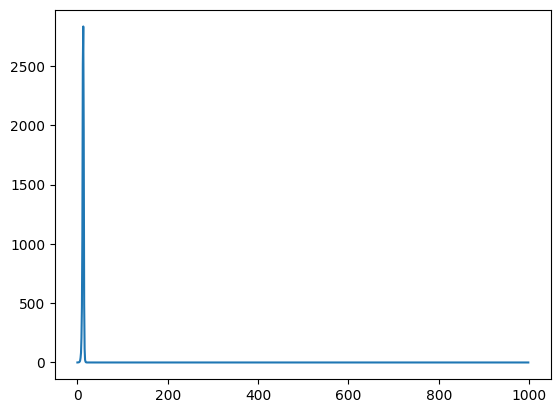

In [424]:
plotter("median","best",1,maxtime=2000)

In [432]:
np.median(allbesties1[:,:,-1], axis=0)[15]

-0.0009722644638860013

In [442]:
np.median(allbesties6[:,:,-1], axis=0)[75]

0.0009007523396151046

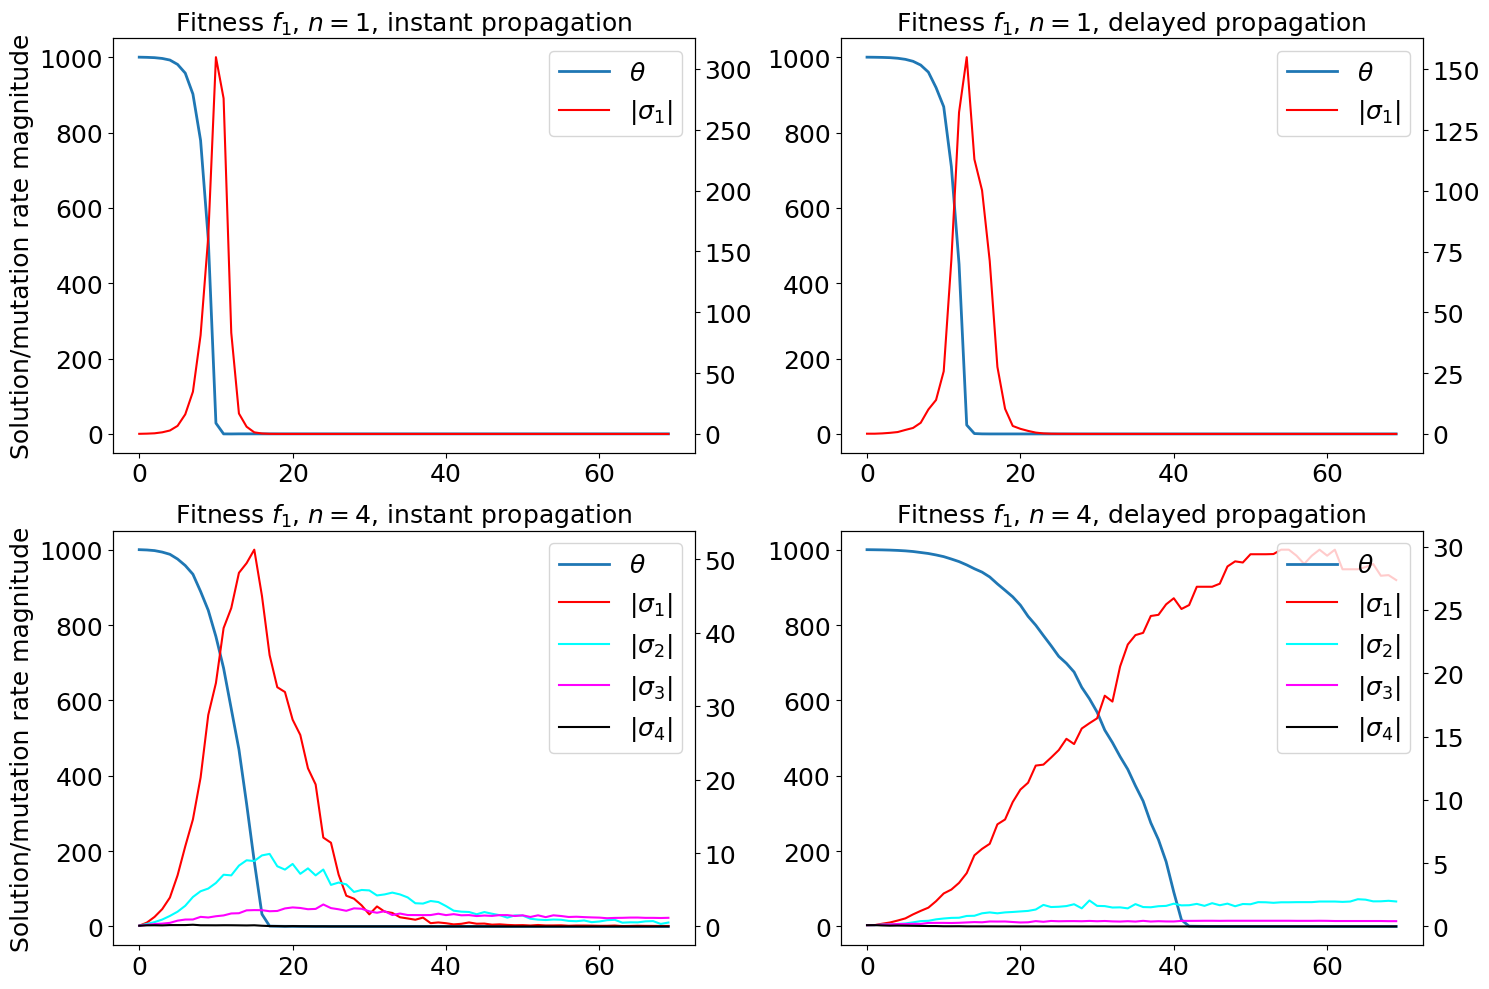

In [468]:
# Create subplots with 2 rows and 1 column
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
(ax1, ax4), (ax3, ax6) = axes

# First plot (top subplot)
#ax1.set_yscale('log')
ax1.plot(np.median(allbesties1[:,:,-1], axis=0)[:70], label=r'$\theta$', alpha = 1.0, linewidth=2)
#ax1.plot(np.median(allbesties1[:,:,-2], axis=0)[:70], label=r'|$\sigma_1$|', alpha = 1.0)
ax96 = ax1.twinx()
ax96.plot(np.median(allbesties1[:,:,-2], axis=0)[:70], label=r'|$\sigma_1$|', color = "red", alpha = 1.0)
#ax1.plot(metabesties3_medians[:1000], label=r'$\sigma_2$', alpha = 0.5)
#ax1.plot(metabesties4_medians[:1000], label=r'$\sigma_1$', alpha=0.7)
#ax1.plot(metabesties5_medians[:1000], label=r'$\theta$', alpha=0.9)
#ax1.plot(metasigmas6_medians, label=r'$\theta$', alpha=0.9)
#ax1.plot(metasigma6s_v1_medians**2, label=r'$\theta^2$', alpha=1.0)
#ax1.set_xlabel("Generation", fontsize=12)
ax1.set_ylabel("Solution/mutation rate magnitude", fontsize=18)
ax1.set_title("Fitness $f_1$, $n=1$, instant propagation", fontsize=18)
#ax1.set_ylim([1e-2000, 2e+2])
ax1.tick_params(axis='both', which='major', labelsize=18)
ax96.tick_params(axis='both', which='major', labelsize=18)
lines1, labels1 = ax1.get_legend_handles_labels()
lines2, labels2 = ax96.get_legend_handles_labels()
ax96.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=18)
#ax1.legend(loc=4, fontsize=18)

#ax2.set_yscale('log')
ax2.plot(np.median(allbesties2[:,:,-1], axis=0)[:70], label=r'$\theta$', alpha = 1.0, linewidth=2)
ax97 = ax2.twinx()
#ax97.set_yscale('log')
ax97.plot(np.median(allbesties2[:,:,-2], axis=0)[:70], label=r'|$\sigma_1$|', color="red", alpha = 1.0)
ax97.plot(np.median(allbesties2[:,:,-3], axis=0)[:70], label=r'|$\sigma_2$|', color="cyan", alpha = 1.0)
ax97.plot(np.median(allbesties2[:,:,-4], axis=0)[:70], label=r'|$\sigma_3$|', color="magenta", alpha=1.0)
#ax2.plot(metabesties5_medians_alt[:1000], label=r'$\theta$', alpha=0.1)
#ax2.plot(metasigmas6_medians_alt, label=r'$\theta$', alpha=0.2, color = "blue")
#ax2.axhline(y=0.04, color='r', linestyle='--', linewidth=1, label=r'0.04')
#ax2.set_xlabel("Generation", fontsize=12)
ax2.set_ylabel("Solution/mutation rate magnitude", fontsize=18)
ax2.set_title("Fitness $f_1$, $n=3$, instant propagation", fontsize=18)
#ax2.set_ylim([1e-2, 2e1])
ax2.tick_params(axis='both', which='major', labelsize=18)
ax97.tick_params(axis='both', which='major', labelsize=18)
lines1, labels1 = ax2.get_legend_handles_labels()
lines2, labels2 = ax97.get_legend_handles_labels()
ax97.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=18)
#ax97.legend(loc=4, fontsize=18)


#ax3.set_yscale('log')
ax3.plot(np.median(allbesties3[:,:,-1], axis=0)[:70], label=r'$\theta$', alpha = 1.0, linewidth=2)
ax98 = ax3.twinx()
ax98.plot(np.median(allbesties3[:,:,-2], axis=0)[:70], label=r'|$\sigma_1$|', color="red", alpha = 1.0)
ax98.plot(np.median(allbesties3[:,:,-3], axis=0)[:70], label=r'|$\sigma_2$|', color="cyan", alpha = 1.0)
ax98.plot(np.median(allbesties3[:,:,-4], axis=0)[:70], label=r'|$\sigma_3$|', color="magenta", alpha=1.0)
ax98.plot(np.median(allbesties3[:,:,-5], axis=0)[:70], label=r'|$\sigma_4$|', color="black", alpha=1.0)
#ax98.plot(np.median(allbesties3[:,:,-6], axis=0)[:70], label=r'|$\sigma_5$|', color="green",  alpha=1.0)
#ax3.axhline(y=0.25, color='r', linestyle='--', linewidth=1, label=r'0.25')
#ax3.set_xlabel("Generation", fontsize=12)
ax3.set_ylabel("Solution/mutation rate magnitude", fontsize=18)
ax3.set_title("Fitness $f_1$, $n=4$, instant propagation", fontsize=18)
#ax3.set_ylim([1e-3, 2e0])
ax3.tick_params(axis='both', which='major', labelsize=18)
ax98.tick_params(axis='both', which='major', labelsize=18)
lines1, labels1 = ax3.get_legend_handles_labels()
lines2, labels2 = ax98.get_legend_handles_labels()
#ax3.legend(lines1, labels1, loc='best', fontsize=18)
ax98.legend(lines1+lines2, labels1+labels2, loc='best', fontsize=18)

#allsigmas1[:,:,-1-level,:],axis=(0,2)

#ax4.set_yscale('log')
ax4.plot(np.median(allbesties4[:,:,-1], axis=0)[:70], label=r'$\theta$', alpha = 1.0, linewidth=2)
ax99 = ax4.twinx()
ax99.plot(np.median(allbesties4[:,:,-2], axis=0)[:70], label=r'|$\sigma_1$|', color = "red", alpha = 1.0)
#ax4.plot(metabesties3_medians2[:1000], label=r'$\sigma_2$', alpha = 0.5)
#ax4.plot(metabesties4_medians2[:1000], label=r'$\sigma_1$', alpha=0.7)
#ax4.plot(metabesties5_medians2[:1000], label=r'$\theta$', alpha=0.9)
#ax1.plot(metasigmas6_medians, label=r'$\theta$', alpha=0.9)
#ax1.plot(metasigma6s_v1_medians**2, label=r'$\theta^2$', alpha=1.0)
#ax1.set_xlabel("Generation", fontsize=12)
#ax4.set_ylabel("Mutation rate magnitude |$\sigma$|", fontsize=18)
ax4.set_title("Fitness $f_1$, $n=1$, delayed propagation", fontsize=18)
#ax4.set_ylim([1e-7, 2e-1])
ax4.tick_params(axis='both', which='major', labelsize=18)
ax99.tick_params(axis='both', which='major', labelsize=18)
lines1, labels1 = ax4.get_legend_handles_labels()
lines2, labels2 = ax99.get_legend_handles_labels()
ax99.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=18)
#ax4.legend(loc=4, fontsize=18)

#ax5.set_yscale('log')
ax5.plot(np.median(allbesties5[:,:,-1], axis=0)[:70], label=r'$\theta$', alpha = 1.0, linewidth=2)
ax100 = ax5.twinx()
ax100.plot(np.median(allbesties5[:,:,-2], axis=0)[:70], label=r'|$\sigma_1$|', color="red", alpha = 1.0)
ax100.plot(np.median(allbesties5[:,:,-3], axis=0)[:70], label=r'|$\sigma_2$|', color="cyan", alpha = 1.0)
ax100.plot(np.median(allbesties5[:,:,-4], axis=0)[:70], label=r'|$\sigma_3$|', color="magenta", alpha=1.0)
#ax5.plot(metabesties5_medians_alt2[:1000], label=r'$\theta$', alpha=0.1)
#ax3.plot(metasigma6s_v1_medians_alt_alt**2, label=r'$\theta^2$', alpha=1.0)
#ax3.axhline(y=0.25, color='r', linestyle='--', linewidth=1, label=r'0.25')
#ax3.set_xlabel("Generation", fontsize=12)
#ax5.set_ylabel("Mutation rate maginute |$\sigma^2$|", fontsize=12)
ax5.set_title("Fitness $f_1$, $n=1$, delayed propagation", fontsize=18)
ax5.tick_params(axis='both', which='major', labelsize=18)
ax100.tick_params(axis='both', which='major', labelsize=18)
lines1, labels1 = ax5.get_legend_handles_labels()
lines2, labels2 = ax100.get_legend_handles_labels()
ax100.legend(lines1 + lines2, labels1 + labels2, loc='best', fontsize=18)
#ax5.set_ylim([1e-8, 1e+3])
#ax5.legend(loc=4, fontsize=18)


#ax6.set_yscale('log')
ax6.plot(np.median(allbesties6[:,:,-1], axis=0)[:70], label=r'$\theta$', alpha = 1.0, linewidth=2)
ax101 = ax6.twinx()
ax101.plot(np.median(allbesties6[:,:,-2], axis=0)[:70], label=r'|$\sigma_1$|', color="red", alpha = 1.0)
ax101.plot(np.median(allbesties6[:,:,-3], axis=0)[:70], label=r'|$\sigma_2$|', color="cyan",  alpha = 1.0)
ax101.plot(np.median(allbesties6[:,:,-4], axis=0)[:70], label=r'|$\sigma_3$|', color="magenta", alpha=1.0)
ax101.plot(np.median(allbesties6[:,:,-5], axis=0)[:70], label=r'|$\sigma_4$|', color="black", alpha=1.0)
#ax101.plot(np.median(allbesties6[:,:,-6], axis=0)[:80], label=r'|$\sigma_5$|', color="green",  alpha=1.0)
#ax3.axhline(y=0.25, color='r', linestyle='--', linewidth=1, label=r'0.25')
#ax3.set_xlabel("Generation", fontsize=12)
#ax6.set_ylabel("utation rate $\sigma^2$", fontsize=12)
ax6.set_title("Fitness $f_1$, $n=4$, delayed propagation", fontsize=18)
ax6.tick_params(axis='both', which='major', labelsize=18)
ax101.tick_params(axis='both', which='major', labelsize=18)
lines1, labels1 = ax6.get_legend_handles_labels()
lines2, labels2 = ax101.get_legend_handles_labels()
ax101.legend(lines1 + lines2, labels1 + labels2, loc='upper right', fontsize=18)

#ax4.set_yscale('log')
#ax4.plot(metasigma1s_v4_medians**2, label=r'$\sigma_2^2$')
#ax4.plot(metasigma2s_v4_medians**2, label=r'$\sigma_1^2$', linewidth = 2)
#ax4.plot(metasigma3s_v4_medians**2, label=r'$\theta^2$')
#ax4.plot(metasigma4s_v4_medians**2, label=r'$\sigma_2^2$', alpha=0.6)
#ax4.plot(metasigma5s_v4_medians**2, label=r'$\sigma_1^2$', alpha=0.6)
#ax4.plot(metasigma6s_v4_medians**2, label=r'$\sigma_1^2$', alpha=0.2)
#ax4.axhline(y=1.0, color='r', linestyle='--', linewidth=1, label=r'1.00')
#ax4.set_xlabel("Generation", fontsize=12)
#ax4.set_ylabel("Median squared mutation rate $\sigma^2$", fontsize=12)
#ax4.set_title("Initialization $\sigma = 1.0$", fontsize=14)
#ax4.legend(loc=2)

# Adjust layout to prevent overlap
plt.tight_layout()

# Uncomment the following line if you want to save the figure
plt.savefig("main1.pdf")

# Show the plots
plt.show()

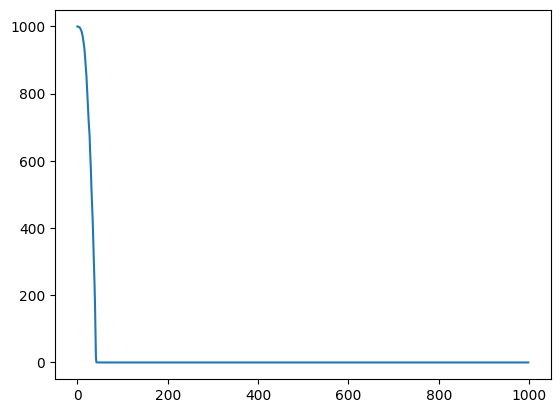

In [472]:
plt.plot(np.median(allbesties6[:,:,-1], axis=0)[:1000])